# Notebook demonstrating the simulation code


In [41]:
import utils
import main
import subprocess
import matplotlib.pyplot as plt

In [53]:
#set up simulation
inner_death_rate = 0.1
outer_death_rate = 0.9
birth_rate = 0.7
driver_advantage = 0.1
treat_size = 10000 
radius = 25
model = "bdg_nonSpatialDeath" #boundary driven growth, proliferative

params = {}
params['driver_advantage'] = driver_advantage
params['model'] = model
#death rate function
params['dr_function'] = 'radial_treatment'
#death rate function parameters
params['dr_params'] = {'treat_size':treat_size, 'inner_rate': inner_death_rate, 
'outer_rate': outer_death_rate, 'radius': radius} 
params['driver_rate'] = 1e-3 #100x empirical estimate 
params['br_params'] = {}
params['br_params']['init_rate'] = birth_rate
params['br_function'] = "one_changing" 
params["select_birth"] = True 
params['reps'] = 1
params['n_cells'] = 10000
params['time_save_interval'] = 5
params['exp_path'] = 'demo-output/timepoints' 

In [54]:
#run 
out = main.single_run(cur_rep = 0, kwargs = params)

starting sanity checks...
trying rep 0
size = 3730
size = 5951
size = 7805
size = 9390
size = 5708
size = 2715
size = 2225
size = 2240
size = 2240
size = 2200
size = 2215
size = 2205
size = 2220
size = 2225
size = 2231
size = 2230
size = 2222
size = 2257
size = 2232
size = 2216
size = 2232
size = 2257
size = 2255
size = 2244
size = 2270
size = 2276
size = 2261
size = 2315
size = 2317
size = 2342
size = 2348
size = 2421
size = 2538
size = 2822
size = 3183
size = 3679
size = 4178
size = 4604
size = 5106
size = 5707
size = 6209
size = 6737
size = 7298
size = 7792
size = 8308
size = 8804
size = 9397
size = 9870


demo-output/timepoints
List of csv files written to all_csv_files.txt
Concatenation complete. Result saved to demo-output/simulation-results.csv.
loading data
making comparison file
plotting clone frequencies for each replicate
Figure(700x700)
Figure(640x480)
done
done with everything


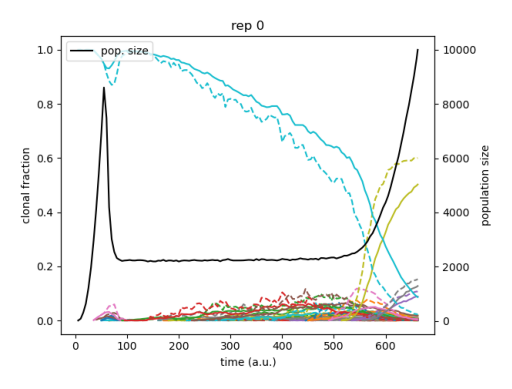

In [55]:
#collect timestep results
subprocess.run(["scripts/collect_results.sh","demo-output/timepoints"])
img = plt.imread("demo-output/postprocessed/figs/timeplot_rep_0.png",)
plt.imshow(img)
plt.axis("off")
plt.show()